In this notebook we analyse the names given to babies in the US over time. All data is in a folder called **names**.
For each year (starting in 1880) we list names that have been used at least $5$times. 

In [4]:
import pandas as pd

def f(year):
    frame = pd.read_csv("names/yob{0}.txt".format(year), header=None).rename(columns={0: "Name", 1: "Gender", 2: "n"})
    frame["year"] = year
    return frame

X = pd.concat({year: f(year) for year in range(1880,2016)}).reset_index(drop=True)

# extract the last letter of the first name
X["last"] = X["Name"].apply(lambda x: x[-1])

# print the head of the DataFrame
X.head(10)

,Name,Gender,n,year,last
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
5,Margaret,F,1578,1880,t
6,Ida,F,1472,1880,a
7,Alice,F,1414,1880,e
8,Bertha,F,1320,1880,a
9,Sarah,F,1288,1880,h


Do not try to run this kind of analysis with Excel. We are dealing with a rather large table here :-)

In [5]:
X.shape

(1858689, 5)

We first ask what have been the most popular names over time. Mary is by a large margin the most popular name for a girl.

In [46]:
X.groupby(["Name","Gender"])["n"].sum().sort_values(ascending=False)

Name           Gender
James          M         5120990
John           M         5095674
Robert         M         4803068
Michael        M         4323928
Mary           F         4118058
William        M         4071645
David          M         3589754
Joseph         M         2581785
Richard        M         2558165
Charles        M         2371621
Thomas         M         2290364
Christopher    M         2004667
Daniel         M         1882435
Elizabeth      F         1610948
Patricia       F         1570954
Matthew        M         1566027
Jennifer       F         1464067
George         M         1457646
Linda          F         1451331
Barbara        F         1433339
Anthony        M         1413852
Donald         M         1409708
Paul           M         1383157
Mark           M         1345859
Edward         M         1283884
Steven         M         1275903
Kenneth        M         1268921
Andrew         M         1266115
Margaret       F         1242141
Joshua         M     

We drill into particular names and plot their relative frequency over time. Names like Elvis reveal interesting spikes.

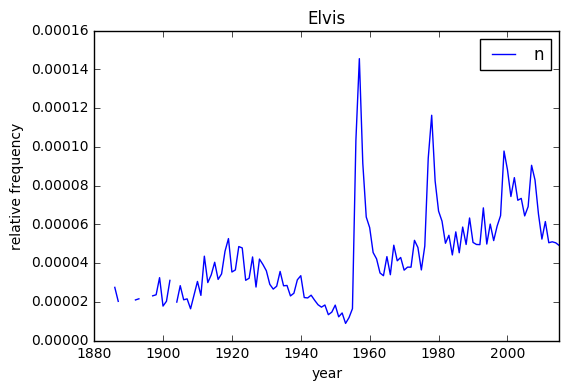

,n
year,
1880,NaN
1881,0.000042
1882,NaN
1883,NaN
1884,NaN
1885,NaN
1886,0.000027
1887,0.000020
1888,NaN


In [10]:
import matplotlib.pyplot as plt

def name_plot(name):
    A=X[X["Name"] == name].groupby("year").sum()
    B=X.groupby("year").sum()
    ratio = A/B
    ratio.plot()
    plt.title(name)
    plt.xlabel('year')
    plt.ylabel('relative frequency')
    plt.show()
    return ratio

name_plot(name="Elvis")


We would like to construct an estimator for the gender purely based on the last letter of the first name. 

In [6]:
A=X.groupby(["Gender","last"])["n"].sum()
A

Gender  last
F       a       57416684
        b          16726
        c          28969
        d         750751
        e       37093632
        f           2178
        g          35940
        h        8035778
        i        3810260
        j           3255
        k          40420
        l        5796244
        m         426110
        n       19906595
        o         407730
        p           4431
        q            610
        r        3923696
        s        3690539
        t        2481962
        u          87198
        v           4245
        w          50517
        x          34636
        y       24671568
        z         140907
M       a        1901692
        b        1408669
        c        1650207
        d       16368949
        e       14603942
        f         206956
        g         594802
        h        6828136
        i         849164
        j          32363
        k        5368359
        l       14936697
        m        5789994
        n   

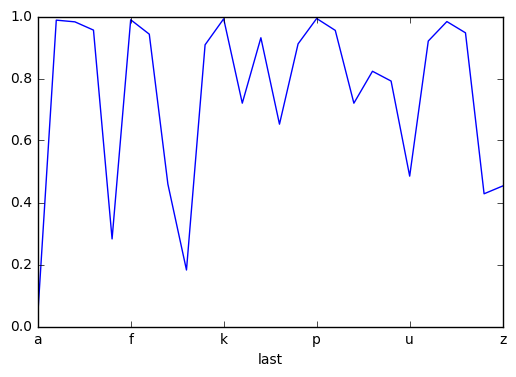

In [11]:
import matplotlib.pyplot as plt

ratio=A.ix["M"]/(A.ix["M"]+A.ix["F"])
ratio.plot()
plt.show()

Horst is not a very common name in the US.

In [12]:
X[X["Name"]=="Horst"]

,Name,Gender,n,year,last
320733,Horst,M,6,1934,t
357098,Horst,M,5,1938,t
374997,Horst,M,5,1940,t
503887,Horst,M,5,1953,t
560366,Horst,M,5,1958,t
596219,Horst,M,5,1961,t
607571,Horst,M,7,1962,t
620219,Horst,M,6,1963,t
633124,Horst,M,5,1964,t
644340,Horst,M,7,1965,t


A first name ending with an **a** is a strong indicator for a girl. We look for male names that end with an **a** here. 

In [14]:
X[(X["last"]=="a") & (X["Gender"]=="M")].groupby("Name")["n"].sum().sort_values(ascending=False)


Name
Joshua           1184722
Dakota             83253
Dana               53005
Ira                52813
Ezra               36040
Luca               19442
Asa                15118
Elisha             12737
Alva               11177
Shea                7314
Otha                6379
Hamza               5879
Andrea              5813
Ora                 5581
Patricia            4962
Yehuda              4925
Hosea               4898
Mustafa             4809
Luka                4750
Aditya              4362
Maria               4221
Santana             4153
Barbara             4137
Linda               3756
Lorenza             3681
Donta               3677
Jessica             3570
Alonza              3310
Kenyatta            3103
Montana             3041
                  ...   
Dontrea                5
Brina                  5
Buenaventura           5
Bugra                  5
Bwana                  5
Nakiya                 5
Nanda                  5
Dkota                  5
Shara               